## 利用opencv进行图像边缘检测，并截取

In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

In [18]:
def showImage(image):
    #plt.imshow(image, cmap='gray')
    plt.imshow(image)
    plt.show()

In [11]:
image = cv2.imread('./街拍样图.jpg')
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

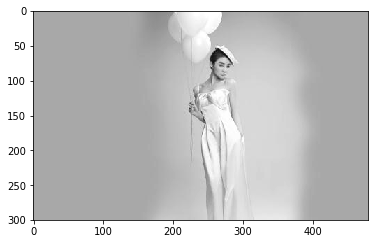

In [12]:
plt.imshow(gray, cmap='gray')
plt.show()

In [13]:
# 用Sobel算子计算x，y方向上的梯度，之后在x方向上减去y方向上的梯度，通过这个减法，我们留下具有高水平梯度和低垂直梯度的图像区域
gradX = cv2.Sobel(gray, ddepth=cv2.CV_32F, dx=1, dy=0, ksize=-1)
gradY = cv2.Sobel(gray, ddepth=cv2.CV_32F, dx=0, dy=1, ksize=-1)

gradient = cv2.subtract(gradX, gradY)
gradient = cv2.convertScaleAbs(gradient)

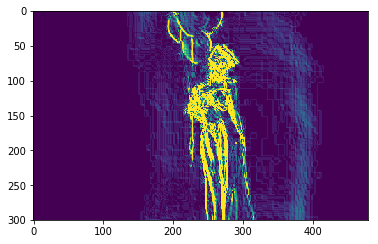

In [14]:
plt.imshow(gradient)
plt.show()

去除图像上的噪声。首先使用低通滤泼器平滑图像（9 x 9内核）,这将有助于平滑图像中的高频噪声。低通滤波器的目标是降低图像的变化率。如将每个像素替换为该像素周围像素的均值。这样就可以平滑并替代那些强度变化明显的区域。然后，对模糊图像二值化。梯度图像中不大于90的任何像素都设置为0（黑色）。 否则，像素设置为255（白色）

In [15]:
# blur and threshold the image
blurred = cv2.blur(gradient, (9, 9))
(_, thresh) = cv2.threshold(blurred, 90, 255, cv2.THRESH_BINARY)

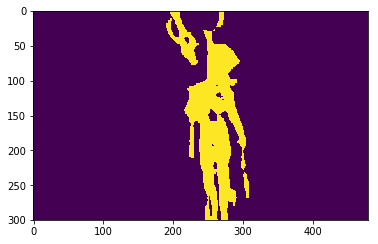

In [19]:
showImage(thresh)

In [24]:
# 要用白色填充这些空余，使得后面的程序更容易识别昆虫区域，这需要做一些形态学方面的操作
# kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (25, 25))
# closed = cv2.morphologyEx(thresh, cv2.MORPH_CLOSE, kernel)
closed = thresh

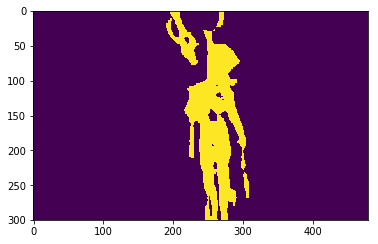

In [25]:
showImage(closed)

In [22]:
# 白色斑点，这会干扰之后轮廓的检测，要把它们去掉。分别执行4次形态学腐蚀与膨胀
# perform a series of erosions and dilations
closed = cv2.erode(closed, None, iterations=4)
closed = cv2.dilate(closed, None, iterations=4)

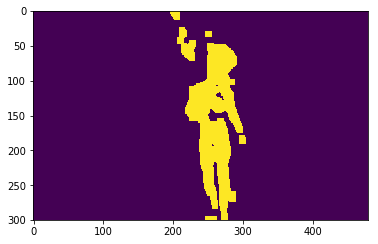

In [23]:
showImage(closed)

In [7]:
(cnts, _) = cv2.findContours(closed.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)[-2:]
c = sorted(cnts, key=cv2.contourArea, reverse=True)[0]

# compute the rotated bounding box of the largest contour
rect = cv2.minAreaRect(c)
box = np.int0(cv2.boxPoints(rect))

# draw a bounding box arounded the detected barcode and display the image
cv2.drawContours(image, [box], -1, (0, 255, 0), 3)
# cv2.imshow("Image", image)
cv2.imwrite("contoursImage2.jpg", image)

True

In [9]:
# 裁剪
# box里保存的是绿色矩形区域四个顶点的坐标。找出四个顶点的x，y坐标的最大最小值。新图像的高=maxY-minY，宽=maxX-minX。
Xs = [i[0] for i in box]
Ys = [i[1] for i in box]
x1 = min(Xs)
x2 = max(Xs)
y1 = min(Ys)
y2 = max(Ys)
hight = y2 - y1
width = x2 - x1
print(x1, x2, y1, y2, hight, width)
image = cv2.imread('./街拍样图.jpg')
cropImg = image[0:hight, x1:x1+width]
cv2.imwrite('cutImg.jpg', cropImg)

187 331 -14 305 319 144


True

In [10]:
cv2.imshow("Image", cropImg)
cv2.waitKey()

27